In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

# header = {"mainGrid", "otherGrids", "hourOfDay"}
# three year power supply records from 1995 to 1998
df= pd.read_csv('./drive/MyDrive/powerSupplyStream.csv')

# create timestamps
start = datetime.datetime(1995, 1, 1, 0)
timestamp_list = [start + datetime.timedelta(hours=x) for x in range(len(df))]
df['timestamps'] = timestamp_list

# mistake in hours numbering hour 6 = 1248 instances
#     #                                 9 = 1246 instances
#     wrongHoursIndex = 24969
#     #for i in np.arange(len(df)-1):
#     #    if df['hourOfDay'][i]+1 != df['hourOfDay'][i + 1] and df['hourOfDay'][i] != 23:
#     #        print("wtf")
#     df.at[wrongHoursIndex, 'hourOfDay'] = 9

df_train, df_test = train_test_split(df, test_size=6000, shuffle=False) # ~20% test split
# hourly change in consumption
diffMain = np.append(np.array(df_train['mainGrid']), 0) - np.append(0,np.array(df_train['mainGrid']))
diffMain = diffMain[0:-1]
diffMain[0] = 0
diffOthers = np.append(np.array(df_train['otherGrids']), 0) - np.append(0,np.array(df_train['otherGrids']))
diffOthers = diffOthers[0:-1]
diffOthers[0] = 0

df_train['diffMain'] = diffMain
df_train['diffOthers'] = diffOthers

df_hourDiffMain = pd.DataFrame()
df_hourDiffOther = pd.DataFrame()
for hour in np.arange(24):
    hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffMain'].values
    df_hourDiffMain[str(hour)] = hourDiffList
    hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffOthers'].values
    df_hourDiffOther[str(hour)] = hourDiffList



In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

# header = {"mainGrid", "otherGrids", "hourOfDay"}
# three year power supply records from 1995 to 1998
def dataPreprocesssing():
    df= pd.read_csv('./drive/MyDrive/powerSupplyStream.csv')

    # create timestamps
    start = datetime.datetime(1995, 1, 1, 0)
    timestamp_list = [start + datetime.timedelta(hours=x) for x in range(len(df))]
    df['timestamps'] = timestamp_list

    # mistake in hours numbering hour 6 = 1248 instances
#     #                                 9 = 1246 instances
#     wrongHoursIndex = 24969
#     #for i in np.arange(len(df)-1):
#     #    if df['hourOfDay'][i]+1 != df['hourOfDay'][i + 1] and df['hourOfDay'][i] != 23:
#     #        print("wtf")
#     df.at[wrongHoursIndex, 'hourOfDay'] = 9

    df_train, df_test = train_test_split(df, test_size=6000, shuffle=False) # ~20% test split
    # hourly change in consumption
    diffMain = np.append(np.array(df_train['mainGrid']), 0) - np.append(0,np.array(df_train['mainGrid']))
    diffMain = diffMain[0:-1]
    diffMain[0] = 0
    diffOthers = np.append(np.array(df_train['otherGrids']), 0) - np.append(0,np.array(df_train['otherGrids']))
    diffOthers = diffOthers[0:-1]
    diffOthers[0] = 0

    df_train['diffMain'] = diffMain
    df_train['diffOthers'] = diffOthers

    df_hourDiffMain = pd.DataFrame()
    df_hourDiffOther = pd.DataFrame()
    for hour in np.arange(24):
        hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffMain'].values
        df_hourDiffMain[str(hour)] = hourDiffList
        hourDiffList = df_train.loc[df_train['hourOfDay'] == hour]['diffOthers'].values
        df_hourDiffOther[str(hour)] = hourDiffList

    # figure(figsize=(22, 5), dpi=80, linewidth=5)
    # plt.title("Main Grid boxplt change of every hour through time")
    # df_hourDiffMain.boxplot()
    # figure(figsize=(22, 5), dpi=80, linewidth=5)
    # plt.title("Other Grids boxplt change of every hour through time")
    # df_hourDiffOther.boxplot()
    # plt.show()
    #
    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # ax1.boxplot(diffMain)
    # ax1.set_title("main Grid")
    # ax2.boxplot(diffOthers)
    # ax2.set_title("other Grids")
    # plt.show()
    #
    # figure(figsize=(90, 16), dpi=80)
    # plt.plot(df_train['timestamps'], df_train['mainGrid'], 'r-')
    # #plt.plot(df_train['timestamps'], df_train['otherGrids'], 'b-')
    # plt.title('Power constumption')
    # plt.xlabel('time', fontsize=14)
    # plt.ylabel('consumption', fontsize=14)
    # plt.show()
    #
    # figure(figsize=(80, 5), dpi=80, linewidth=1)
    # plt.plot(df_train['timestamps'], df_train['diffMain'], 'r-')
    # #plt.plot(df_train['timestamps'], df_train['diffOthers'], 'b-')
    # plt.title('Power constumption diff')
    # plt.xlabel('time', fontsize=14)
    # plt.ylabel('consumption', fontsize=14)
    # plt.show()

    return df_train, df_test


if __name__ == "__main__":
    dataPreprocesssing()


'''
Check weak stationary:
    mean constant
    variance finite, few outliers
    autocovariance only changes with relative lag

Additive model: !!!! FOCUS ON TREND AND SEASONALITY -> INVARIANT !!!!
    data = trend + seasonality + randomness
    -> Detrend (Linear Filter, Regression, Differencing (preferred))
    -> remove Seasonality (Low pass filter, Lagged differencing)
        -> also try Season length estimator -> Autocorrelation analysis (or Spectral analysis)

Make Data Locally stationary -> Window Functions
    -> to then apply univariate Models
        -> exp smoothing, ARMA, ARIMA, GARCH
    -> or ML models (RNN, LSTM)
'''


'\nCheck weak stationary:\n    mean constant\n    variance finite, few outliers\n    autocovariance only changes with relative lag\n\nAdditive model: !!!! FOCUS ON TREND AND SEASONALITY -> INVARIANT !!!!\n    data = trend + seasonality + randomness\n    -> Detrend (Linear Filter, Regression, Differencing (preferred))\n    -> remove Seasonality (Low pass filter, Lagged differencing)\n        -> also try Season length estimator -> Autocorrelation analysis (or Spectral analysis)\n\nMake Data Locally stationary -> Window Functions\n    -> to then apply univariate Models\n        -> exp smoothing, ARMA, ARIMA, GARCH\n    -> or ML models (RNN, LSTM)\n'

Top 4 found frequencies [1/h]: 
[0.00012538 0.00593447 0.04166667 0.08333333]
 		 [hours]: 
[  12.           24.          168.50704225 7976.        ]
 		 [days]: 
[  0.5          1.           7.02112676 332.33333333]


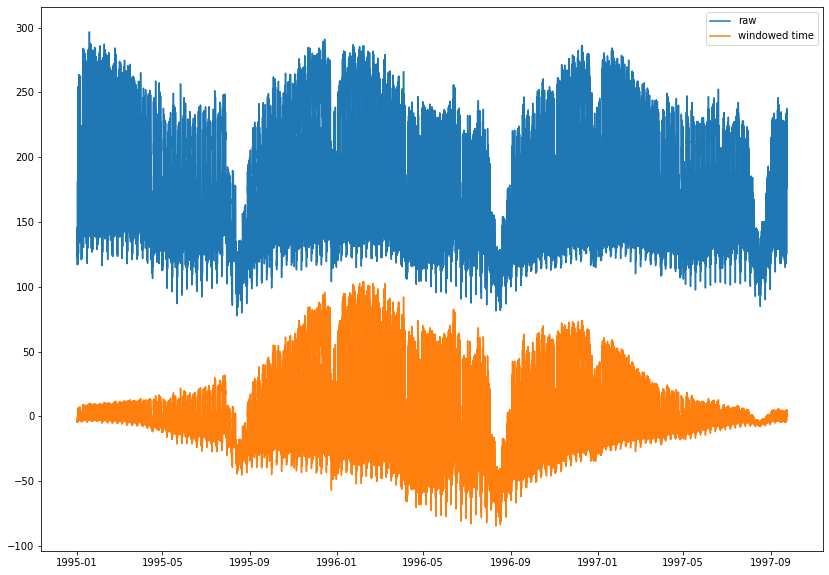

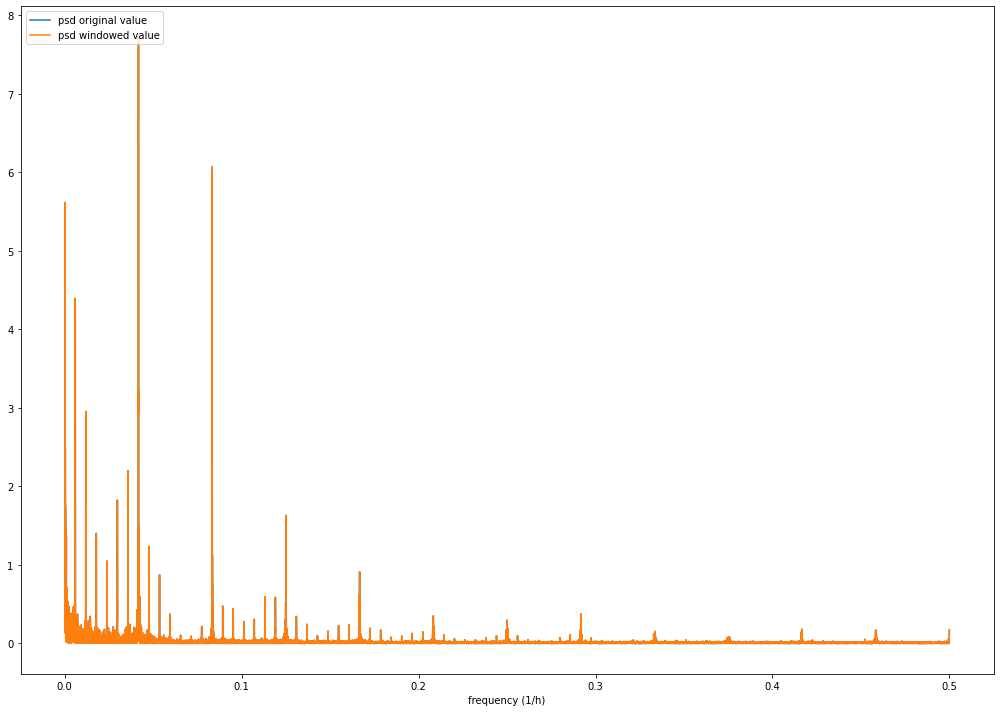

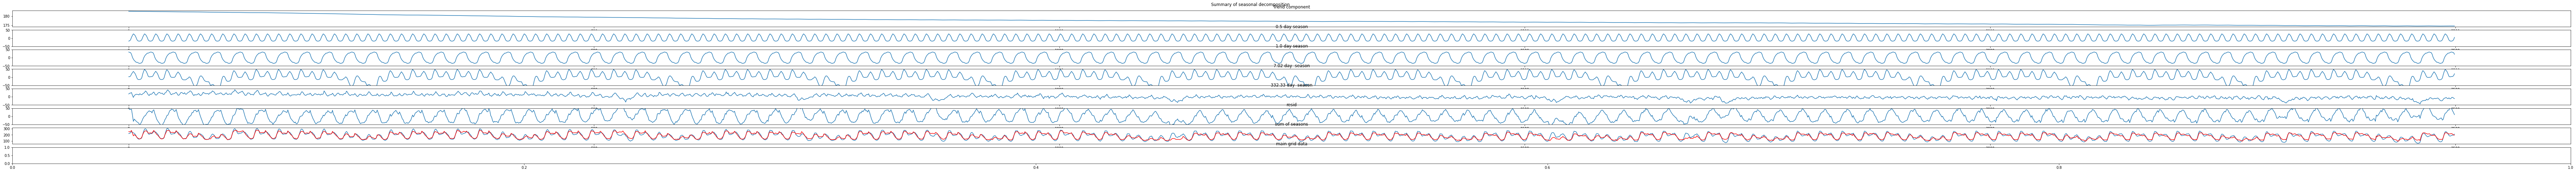

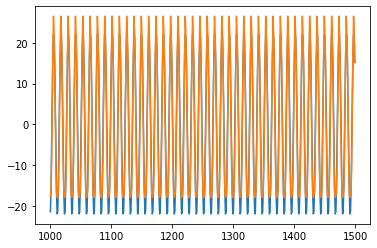

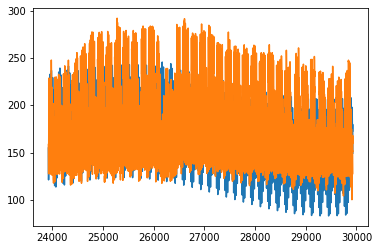

Additive model MSE:
 			 1119.6759
               RMSE:
 			 33.4616


In [ ]:
import numpy as np
from scipy.fftpack import rfft, rfftfreq
import scipy.signal.windows as window
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import pandas as pd

def plotDataAndWindow(time_: np.ndarray,
                      val_orig: pd.core.series.Series,
                      val_window: pd.core.series.Series):
    plt.figure(figsize=(14, 10))
    plt.plot(time_, val_orig, label='raw')
    plt.plot(time_, val_window, label='windowed time')
    plt.legend()
    plt.show()
    return


def plotFTResults(val_orig_psd: np.ndarray,
                  val_widw_psd: np.ndarray,
                  ft_smpl_freq: np.ndarray,
                  pos: int = 2, annot_mode: bool = True
                  ):
    """
    For PSD graph, the first few points are removed because it represents the baseline (or mean)
    """
    plt.figure(figsize=(14, 10))
    plt.plot(ft_smpl_freq[pos:], val_orig_psd[pos:], label='psd original value')
    plt.plot(ft_smpl_freq[pos:], val_widw_psd[pos:], label='psd windowed value')
    plt.xlabel('frequency (1/h)')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
    return

def rmTrend(df_train):
    regr = linear_model.LinearRegression()
    x = df_train.iloc[:, 0].values
    y = df_train['mainGrid'].values
    x = x.reshape(np.size(x), 1)
    y = y.reshape(np.size(y), 1)
    regr.fit(x,y)
    mainPred = regr.predict(df_train['mainGrid'].values.reshape(np.size(x), 1))
    mainDetrend = df_train['mainGrid'].values.reshape(np.size(x), 1)-mainPred
    df_train['detrendMain'] = mainDetrend
    return df_train





def additiveModel(df_train, t=None, ignore_plots=False):
    data_mainGrid = df_train['mainGrid']
    # window function
    data_window = ((data_mainGrid - np.median(data_mainGrid)) * window.hamming(len(data_mainGrid), sym=False)).values

    Fs = 1  # sampling rate
    fftt = np.abs(rfft(data_window)) / len(data_window)
    ind = np.argpartition(fftt, -10)[-10:]
    ind = ind[-5:]
    freq = rfftfreq(int(len(data_window)), d=1 / Fs)
    topFreq = np.unique(freq[ind])
    topFreq = topFreq[topFreq != 0.]  # 0 is baseline, useless
    topHourSeason = np.sort(1 / topFreq)
    topDaySeason = topHourSeason / 24
    if not ignore_plots:
        print("Top 4 found frequencies [1/h]: ")
        print(topFreq)
        print(" \t\t [hours]: ")
        print(topHourSeason)
        print(" \t\t [days]: ")
        print(topDaySeason)

        plotDataAndWindow(df_train['timestamps'], df_train['mainGrid'], data_window)
        plotFTResults(fftt, abs(rfft(data_window) / len(data_window)), freq)

    sd_0 = seasonal_decompose(df_train['mainGrid'].values, period=int(topHourSeason[0]))
    sd_1 = seasonal_decompose(df_train['mainGrid'].values.reshape(-1, 1) - np.array(sd_0.seasonal).reshape(-1, 1),
                              period=int(topHourSeason[1]))
    sd_2 = seasonal_decompose(df_train['mainGrid'].values.reshape(-1, 1) - np.array(sd_1.seasonal).reshape(-1, 1),
                              period=int(topHourSeason[2]))
    sd_3 = seasonal_decompose(df_train['mainGrid'].values.reshape(-1, 1) - np.array(sd_2.seasonal).reshape(-1, 1),
                              period=int(topHourSeason[3]), extrapolate_trend='freq')
    if not ignore_plots:
        # drawing figure with subplots, predefined size and resolution
        f, axes = plt.subplots(8, 1, figsize=(130, 8))
        # setting figure title and adjusting title position and size
        range_start = 10000
        range_end = 12500
        plt.suptitle('Summary of seasonal decomposition', y=0.92)
        axes[0].plot(sd_3.trend[range_start:range_end])
        axes[0].set_title('Trend component')
        #axes[0].set_ylim([85, 280])
        axes[1].plot(sd_0.seasonal[range_start:range_end])
        axes[1].set_title(str(np.round(topDaySeason[0], 2)) + ' day season')
        axes[1].set_ylim([-50, 50])
        axes[2].plot(sd_1.seasonal[range_start:range_end])
        axes[2].set_title(str(np.round(topDaySeason[1], 2)) + ' day season')
        axes[2].set_ylim([-50, 50])
        axes[3].plot(sd_2.seasonal[range_start:range_end])
        axes[3].set_title(str(np.round(topDaySeason[2], 2)) + ' day  season')
        axes[3].set_ylim([-50, 50])
        axes[4].plot(sd_3.seasonal[range_start:range_end])
        axes[4].set_title(str(np.round(topDaySeason[3], 2)) + ' day  season')
        axes[4].set_ylim([-50, 50])
        axes[5].plot(sd_3.resid[range_start:range_end])
        axes[5].set_title('resid')
        axes[5].set_ylim([-50, 50])
        # plot sum of seasonal decomposition + offset (=mean of trend)
        axes[6].plot(sd_0.seasonal[range_start:range_end] + sd_1.seasonal[range_start:range_end] + sd_2.seasonal[
                                                                                                   range_start:range_end] + sd_3.seasonal[
                                                                                                                            range_start:range_end] + sd_3.trend[
                                                                                                   range_start:range_end])
        axes[6].set_title('sum of seasons')
        axes[6].plot(pd.Series.to_numpy(df_train["mainGrid"][range_start:range_end]), "r")
        axes[7].set_title('main grid data')
        plt.show()

    # save residuals/ noise to csv for further use
    np.savetxt("noise.csv", sd_3.resid, delimiter=",")

    # wave functions to model found seasons
    def f0(t, A, b, C, d, E):
        return A * np.sin(2 * np.pi / topHourSeason[0] * t + b) + C * np.cos(
            2 * np.pi / topHourSeason[0] * t + d) + E

    def f0x(t, params):
        return f0(t, params[0], params[1], params[2], params[3], params[4])

    def f1(t, A, b, C, d, E):
        return A * np.sin(2 * np.pi / topHourSeason[1] * t + b) + C * np.cos(
            2 * np.pi / topHourSeason[1] * t + d) + E

    def f1x(t, params):
        return f1(t, params[0], params[1], params[2], params[3], params[4])

    def f2(t, A, b, C, d, E):
        return A * np.sin(2 * np.pi / topHourSeason[2] * t + b) + C * np.cos(
            2 * np.pi / topHourSeason[2] * t + d) + E

    def f2x(t, params):
        return f2(t, params[0], params[1], params[2], params[3], params[4])

    def f3(t, A, b, C, d, E):
        return A * np.sin(2 * np.pi / topHourSeason[3] * t + b) + C * np.cos(
            2 * np.pi / topHourSeason[3] * t + d) + E

    def f3x(t, params):
        return f3(t, params[0], params[1], params[2], params[3], params[4])

    # Functions to model trend component
    def f4(t, A, d):
        return A * t + d

    def f4x(t, params):
        return f4(t, params[0], params[1])

    x = df_train.iloc[:, 0].values
    para0, para0_cov = curve_fit(f0, x, sd_0.seasonal)
    para1, para1_cov = curve_fit(f1, x, sd_1.seasonal)
    para2, para2_cov = curve_fit(f2, x, sd_2.seasonal)
    para3, para3_cov = curve_fit(f3, x, sd_3.seasonal)
    para4, para4_cov = curve_fit(f4, x, sd_3.trend) # trend component

    if not ignore_plots:
        x_plt = x[1000:1500]
        plt.plot(x_plt, f0(x_plt, para0[0], para0[1], para0[2], para0[3], para0[4]))
        plt.plot(x_plt, sd_0.seasonal[1000:1500])
        plt.show()

    # FINAL ADDITIVE MODEL:
    def model_additive(t):
        return f0x(t, para0) + f1x(t, para1) + f2x(t, para2) + f3x(t, para3) + f4x(t, para4)

    if not ignore_plots:
        t_test = df_test.iloc[:, 0].values
        plt.figure()
        plt.plot(t_test, model_additive(t_test), )
        plt.plot(t_test, df_test['mainGrid'])
        plt.show()

        mse = metrics.mean_squared_error(df_test["mainGrid"], model_additive(t_test))
        rmse = np.sqrt(mse)
        print("============================")
        print("Additive model MSE:")
        print(" \t\t\t " + str(np.round(mse, 4)))
        print("               RMSE:")
        print(" \t\t\t " + str(np.round(rmse, 4)))
        print("============================")

    if t is not None:
        return model_additive(t)


'''
- data_train, training dataset, where seasons are extracted. (from DataPreprocessing)
- t, array of timestamps for which to calculate estimates

returns array of estimates
'''
def getAdditiveModel(data_train, t):
    return additiveModel(data_train, t, ignore_plots=True)


if __name__ == "__main__":
    df_train, df_test = dataPreprocesssing()
    additiveModel(df_train)


In [ ]:
df.shape[0]+6000

29927

In [ ]:
df= pd.read_csv('./drive/MyDrive/noise.csv')

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
# Since the p-value is small it is stationary

1. ADF :  -7.063927094584698
2. P-Value :  5.13860631006643e-10
3. Num Of Lags :  48
4. Num Of Observations Used For ADF Regression: 23878
5. Critical Values :
	 1% :  -3.4306238924168486
	 5% :  -2.861661051905028
	 10% :  -2.5668344324331884


In [ ]:
from pmdarima import auto_arima


In [ ]:
stepwise_fit = auto_arima(df, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173470.865, Time=11.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=179830.480, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=174059.336, Time=0.89 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=175791.096, Time=6.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=179828.480, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=173456.613, Time=9.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=174502.865, Time=11.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=173472.688, Time=8.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=49.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=174044.207, Time=11.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173461.936, Time=13.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=165300.201, Time=69.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=72.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=165082.666, Time=72.15 sec
 ARIMA(1,1,

In [ ]:
print(df.shape)
train_size = 23927- 2728
train=df.iloc[:train_size]
test=df.iloc[23928:]
print(train.shape,test.shape)

(23927, 1)
(21199, 1) (0, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train,order=(2,1,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     -6.236328179343347955e+01   No. Observations:                21199
Model:                        ARIMA(2, 1, 4)   Log Likelihood              -73254.091
Date:                       Fri, 20 Jan 2023   AIC                         146522.182
Time:                               13:39:48   BIC                         146577.914
Sample:                                    0   HQIC                        146540.364
                                     - 21199                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9260      0.001   2142.701      0.000       1.924       1.928
ar.L2         -0.9939      0.001  -1106.649      0.000      -0.996      -0.992
ma.L1         -1.9134      0.007   -281.614      0.000      -1.927      -1.900
ma.L2          0.8436      0.015     56.360      0.000       0.814       0.873
ma.L3          0.2143      0.015     13.905      0.000       0.184       0.245
ma.L4         -0.1102      0.007    -15.352      0.000      -0.124      -0.096
sigma2        58.7489      0.487    120.745      0.000      57.795      59.703
===================================================================================
Ljung-Box (L1) (Q):                   5.26   Jarque-Bera (JB):              2273.96
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

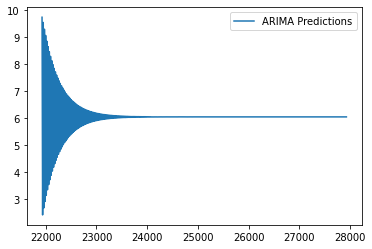

In [ ]:
start= 19141+2786
end=19141+2786+6000
true_predictions=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
true_predictions.plot(legend=True)


6000
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
(6000,)
(6001,)


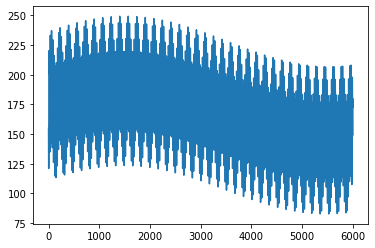

6000


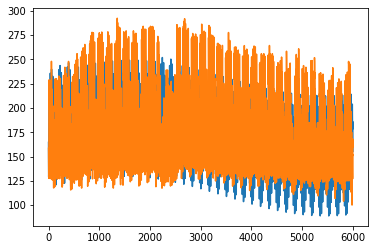

32.4159962252763

In [ ]:
from sklearn.metrics import mean_squared_error
df_train, df_test = dataPreprocesssing()
t = df_test.iloc[:, 0].values
print(len(t))
add = additiveModel(df_train, t, ignore_plots=True)
# len(add)
print(type(add))
print(type(true_predictions))
print(add.shape)
print(true_predictions.shape)
plt.plot(add)
plt.show()
final = []
test = df_test['mainGrid'].values

predict = true_predictions.values
for i in range(0,6000,1):
    final.append(add[i] + predict[i])
print(len(final))
plt.plot(final)
plt.plot(df_test['mainGrid'].values)
plt.show()
np.sqrt(mean_squared_error(df_test['mainGrid'].values, final))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['mainGrid'].mean()
rmse=sqrt(mean_squared_error(pred,test['mainGrid']))
print(rmse)

IndexError: ignored

In [ ]:
model.save('./drive/MyDrive/model_arima_better.pkl')
# load model
